### Objective: 
##### The main goal of this assignment is to conduct a thorough exploratory analysis of the "cardiographic.csv" dataset to uncover insights, identify patterns, and understand the dataset's underlying structure. You will use statistical summaries, visualizations, and data manipulation techniques to explore the dataset comprehensively


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 1) Data Cleaning and Preparation:

##### ●	Load the dataset into a data frame or equivalent data structure.

In [97]:
df=pd.read_csv("Cardiotocographic.csv")

In [102]:
df

LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  
0      0.5  43.000000   2.4   64.0  0.999926  2.000000  
1      2.1   0.000000  10.4  130.0  0.000000  1.000000  
2      2.1   0.000000  13.4  130.0  0.000000  1.000000  
3      2.4   0.000000  23.0  117.0  1.000000  1.000000  
4      2.4   0.000000  19.9  117.0  1.000000  1.000000  
...    ...        ...   ...    ...       ...       ...  
2121   0.2  25.000000   7.2   40.0  0.000000  2.000000  
2122   0.4  22.000000   7.1   66.0  1.000000  2.000000  
2123   0.4  20.000000   6.1   67.0  1.000000  1.990464  
2124   0.4  27.000000   7.0   66.0  1.000000  2.000000  
2125   0.4  35.857183   5.0   42.0  0.000000  1.000000  

[2126 rows x 14 columns]

In [103]:
df.shape

(2126, 14)

##### ●	Handle missing values appropriately (e.g., imputation, deletion).

In [104]:
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [105]:
df.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [106]:
df.isnull().sum().sum()/len(df)*100

7.855126999059266

In [107]:
df.fillna({'LB':df.LB.median(),'AC':df.AC.median(),'DS':df.DS.median(),'DP':df.DP.median(),'MLTV':df.MLTV.median(),
          'Width':df.Width.median(),'Tendency':df.Tendency.median(),'NSP':df.NSP.median()},inplace=True)

In [108]:
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [109]:
df.duplicated().sum()

2

In [110]:
df.drop_duplicates(ignore_index=True,inplace=True)

In [111]:
df.duplicated().sum()

0

##### ●	Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).

In [112]:
df.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [113]:
# Here all numerical values are stored as float datatype. None of the nuerical values stored as strings

##### ●	Detect and treat outliers if necessary.

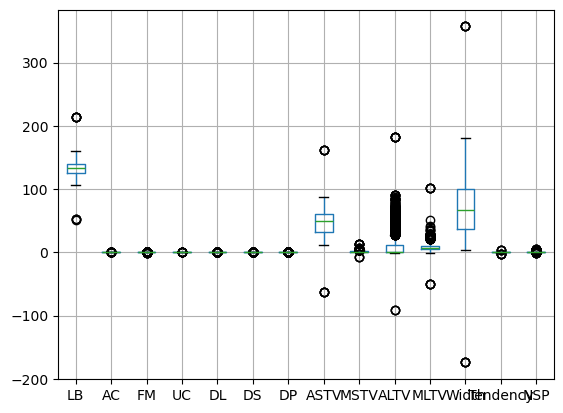

In [114]:
df.boxplot()
plt.show()

In [115]:
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25) #It finds the value at the given percentile in the data. Q1=25%
    Q3=df[column].quantile(0.75) #Q3 = 75%
    IQR=Q3-Q1
    lower_extreme=Q1-1.5*IQR
    upper_extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

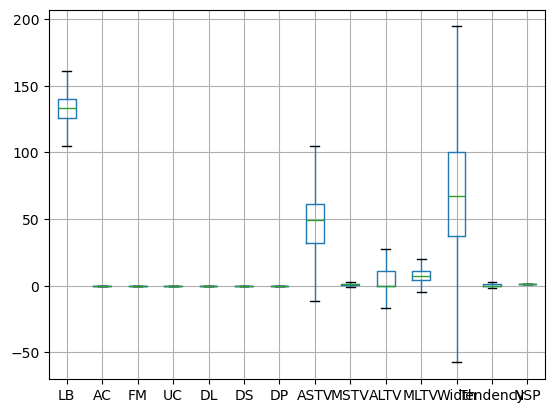

In [116]:
df.boxplot()
plt.show()

### 2) Statistical Summary:

##### ●	Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).

In [117]:
df.mean()

LB          133.288721
AC            0.003133
FM            0.001570
UC            0.004365
DL            0.001772
DS            0.000000
DP            0.000000
ASTV         46.998334
MSTV          1.304554
ALTV          6.697979
MLTV          8.002912
Width        70.318547
Tendency      0.316835
NSP           1.000000
dtype: float64

In [118]:
df.median()

LB          133.000000
AC            0.001634
FM            0.000000
UC            0.004486
DL            0.000000
DS            0.000000
DP            0.000000
ASTV         49.000000
MSTV          1.200000
ALTV          0.000000
MLTV          7.400000
Width        67.000000
Tendency      0.000000
NSP           1.000000
dtype: float64

In [119]:
df.std()

LB           9.926790
AC           0.003830
FM           0.002487
UC           0.003001
DL           0.002670
DS           0.000000
DP           0.000000
ASTV        17.609911
MSTV         0.781303
ALTV        10.381254
MLTV         5.046792
Width       39.577385
Tendency     0.622623
NSP          0.000000
dtype: float64

In [120]:
Q3=df.quantile(0.75)
Q1=df.quantile(0.25)
IQR=Q3-Q1

In [121]:
IQR

LB          14.000000
AC           0.005612
FM           0.002568
UC           0.004678
DL           0.003292
DS           0.000000
DP           0.000000
ASTV        29.000000
MSTV         1.000000
ALTV        11.000000
MLTV         6.200000
Width       63.000000
Tendency     1.000000
NSP          0.000000
dtype: float64

### Data Visualization

##### ●	Create histograms or boxplots to visualize the distributions of various numerical variables.

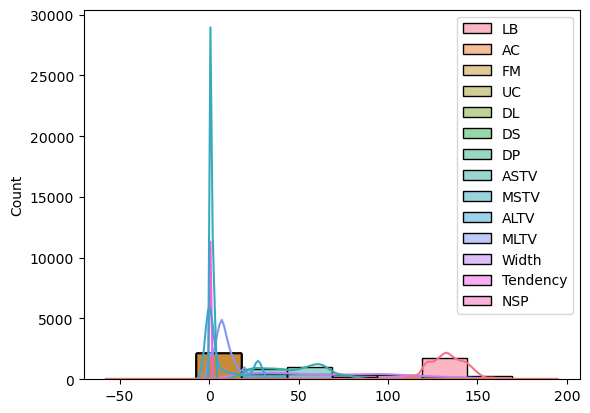

In [122]:
sns.histplot(data=df,bins=10,kde=True)
plt.show()

##### ●	Use bar charts or pie charts to display the frequency of categories for categorical variables.

In [123]:
### We cannot display bar charts or pie charts for categorical columns as we dont have any categorical columns in our dataframe. We only have numerical columns

##### ● Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.

In [124]:
corr=df.corr()

In [125]:
corr

LB        AC        FM        UC        DL  DS  DP      ASTV  \
LB        1.000000 -0.081548 -0.006840 -0.163345 -0.156314 NaN NaN  0.285464   
AC       -0.081548  1.000000  0.075611  0.093222 -0.103258 NaN NaN -0.273189   
FM       -0.006840  0.075611  1.000000 -0.318156 -0.018024 NaN NaN  0.155798   
UC       -0.163345  0.093222 -0.318156  1.000000  0.268151 NaN NaN -0.217484   
DL       -0.156314 -0.103258 -0.018024  0.268151  1.000000 NaN NaN -0.112289   
DS             NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   
DP             NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   
ASTV      0.285464 -0.273189  0.155798 -0.217484 -0.112289 NaN NaN  1.000000   
MSTV     -0.295132  0.216861  0.070412  0.298462  0.566625 NaN NaN -0.433731   
ALTV      0.322864 -0.408246 -0.013820 -0.294226 -0.296383 NaN NaN  0.438800   
MLTV     -0.042241 -0.151713 -0.036439 -0.073152 -0.242345 NaN NaN -0.323930   
Width    -0.139978  0.283750  0.164178  0.131010  0.514238 NaN NaN -0.242111   
Tendency  0.281144  0.030489  0.000302 -0.074729  0.014025 NaN NaN -0.010237   
NSP            NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   

              MSTV      ALTV      MLTV     Width  Tendency  NSP  
LB       -0.295132  0.322864 -0.042241 -0.139978  0.281144  NaN  
AC        0.216861 -0.408246 -0.151713  0.283750  0.030489  NaN  
FM        0.070412 -0.013820 -0.036439  0.164178  0.000302  NaN  
UC        0.298462 -0.294226 -0.073152  0.131010 -0.074729  NaN  
DL        0.566625 -0.296383 -0.242345  0.514238  0.014025  NaN  
DS             NaN       NaN       NaN       NaN       NaN  NaN  
DP             NaN       NaN       NaN       NaN       NaN  NaN  
ASTV     -0.433731  0.438800 -0.323930 -0.242111 -0.010237  NaN  
MSTV      1.000000 -0.541296  0.010734  0.646155 -0.064696  NaN  
ALTV     -0.541296  1.000000 -0.132584 -0.439604  0.052204  NaN  
MLTV      0.010734 -0.132584  1.000000  0.073599  0.142741  NaN  
Width     0.646155 -0.439604  0.073599  1.000000  0.101289  NaN  
Tendency -0.064696  0.052204  0.142741  0.101289  1.000000  NaN  
NSP            NaN       NaN       NaN       NaN       NaN  NaN

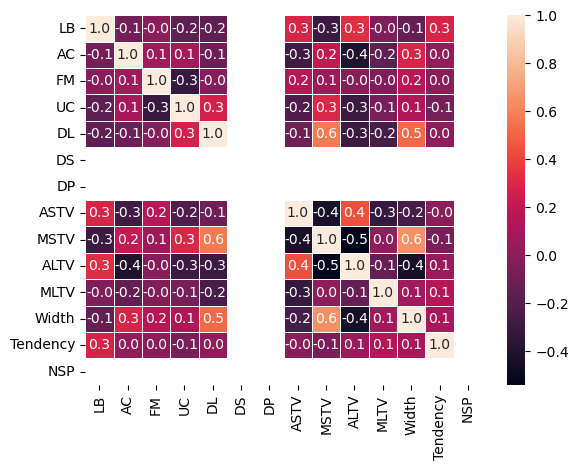

<Figure size 1400x1200 with 0 Axes>

In [138]:
sns.heatmap(corr,annot=True,fmt='0.1f',linewidths='0.5')
plt.figure(figsize=(14,12))
plt.tight_layout()
plt.show()

##### ●	Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.

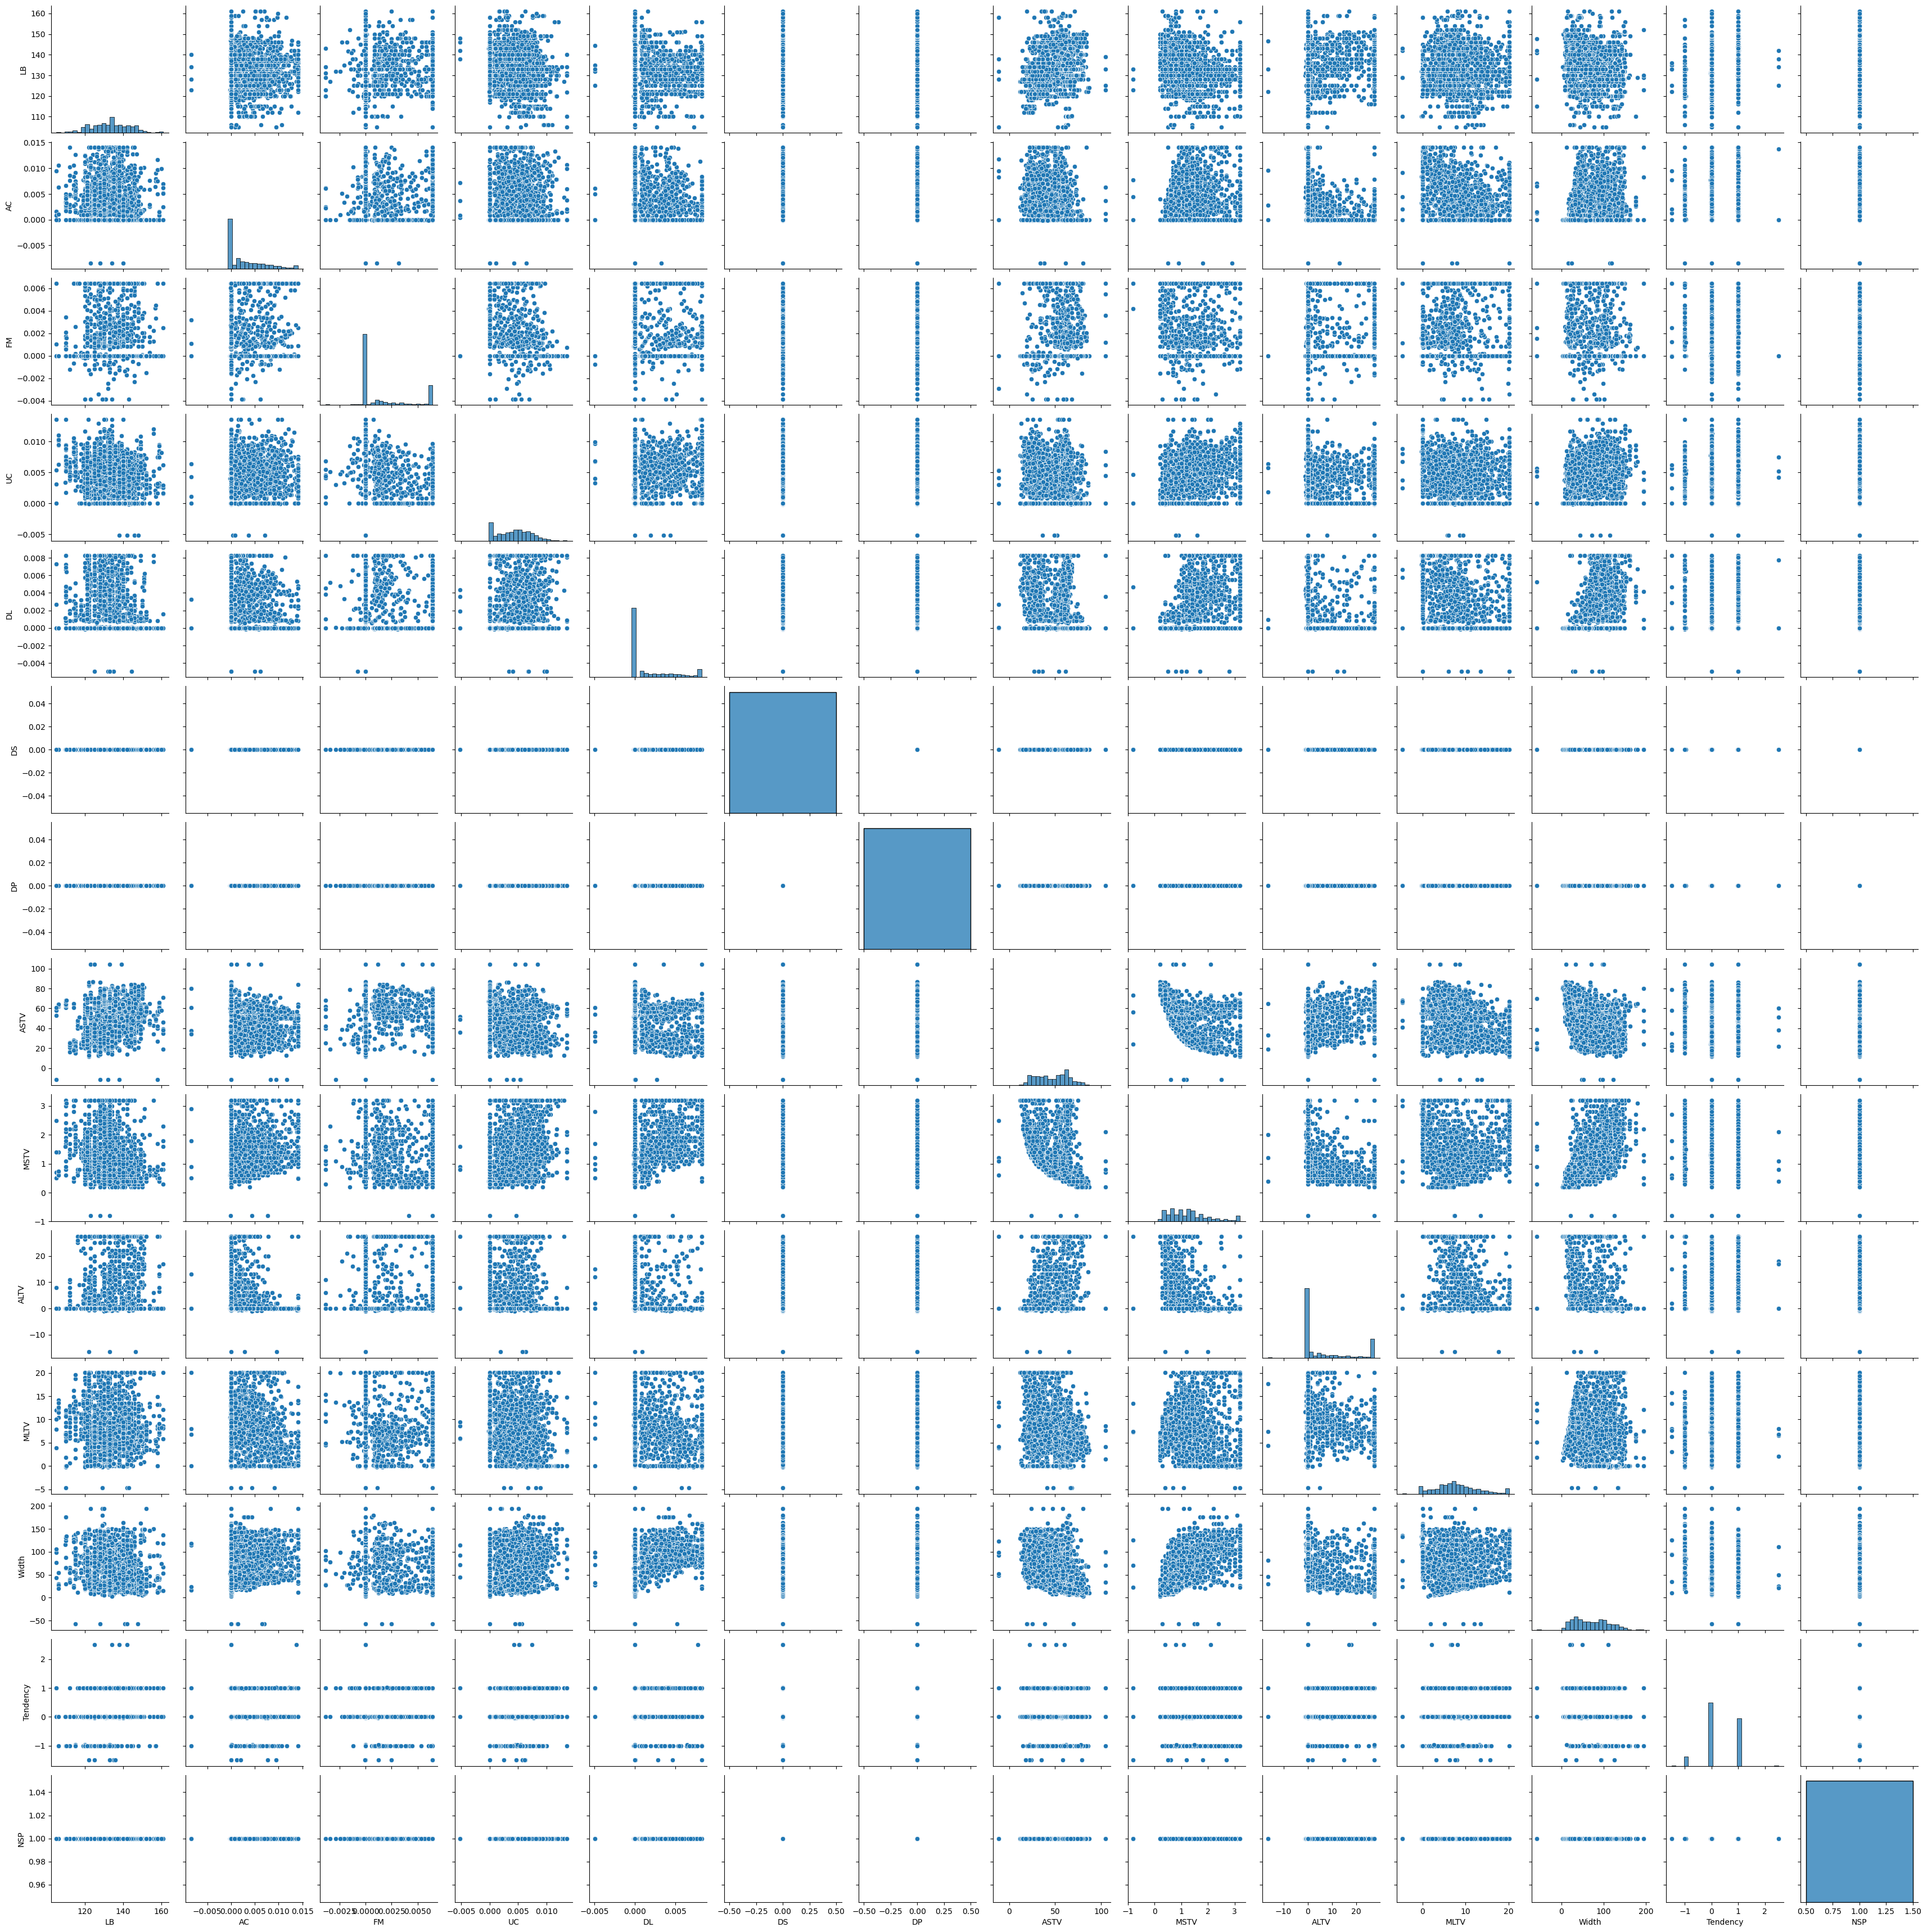

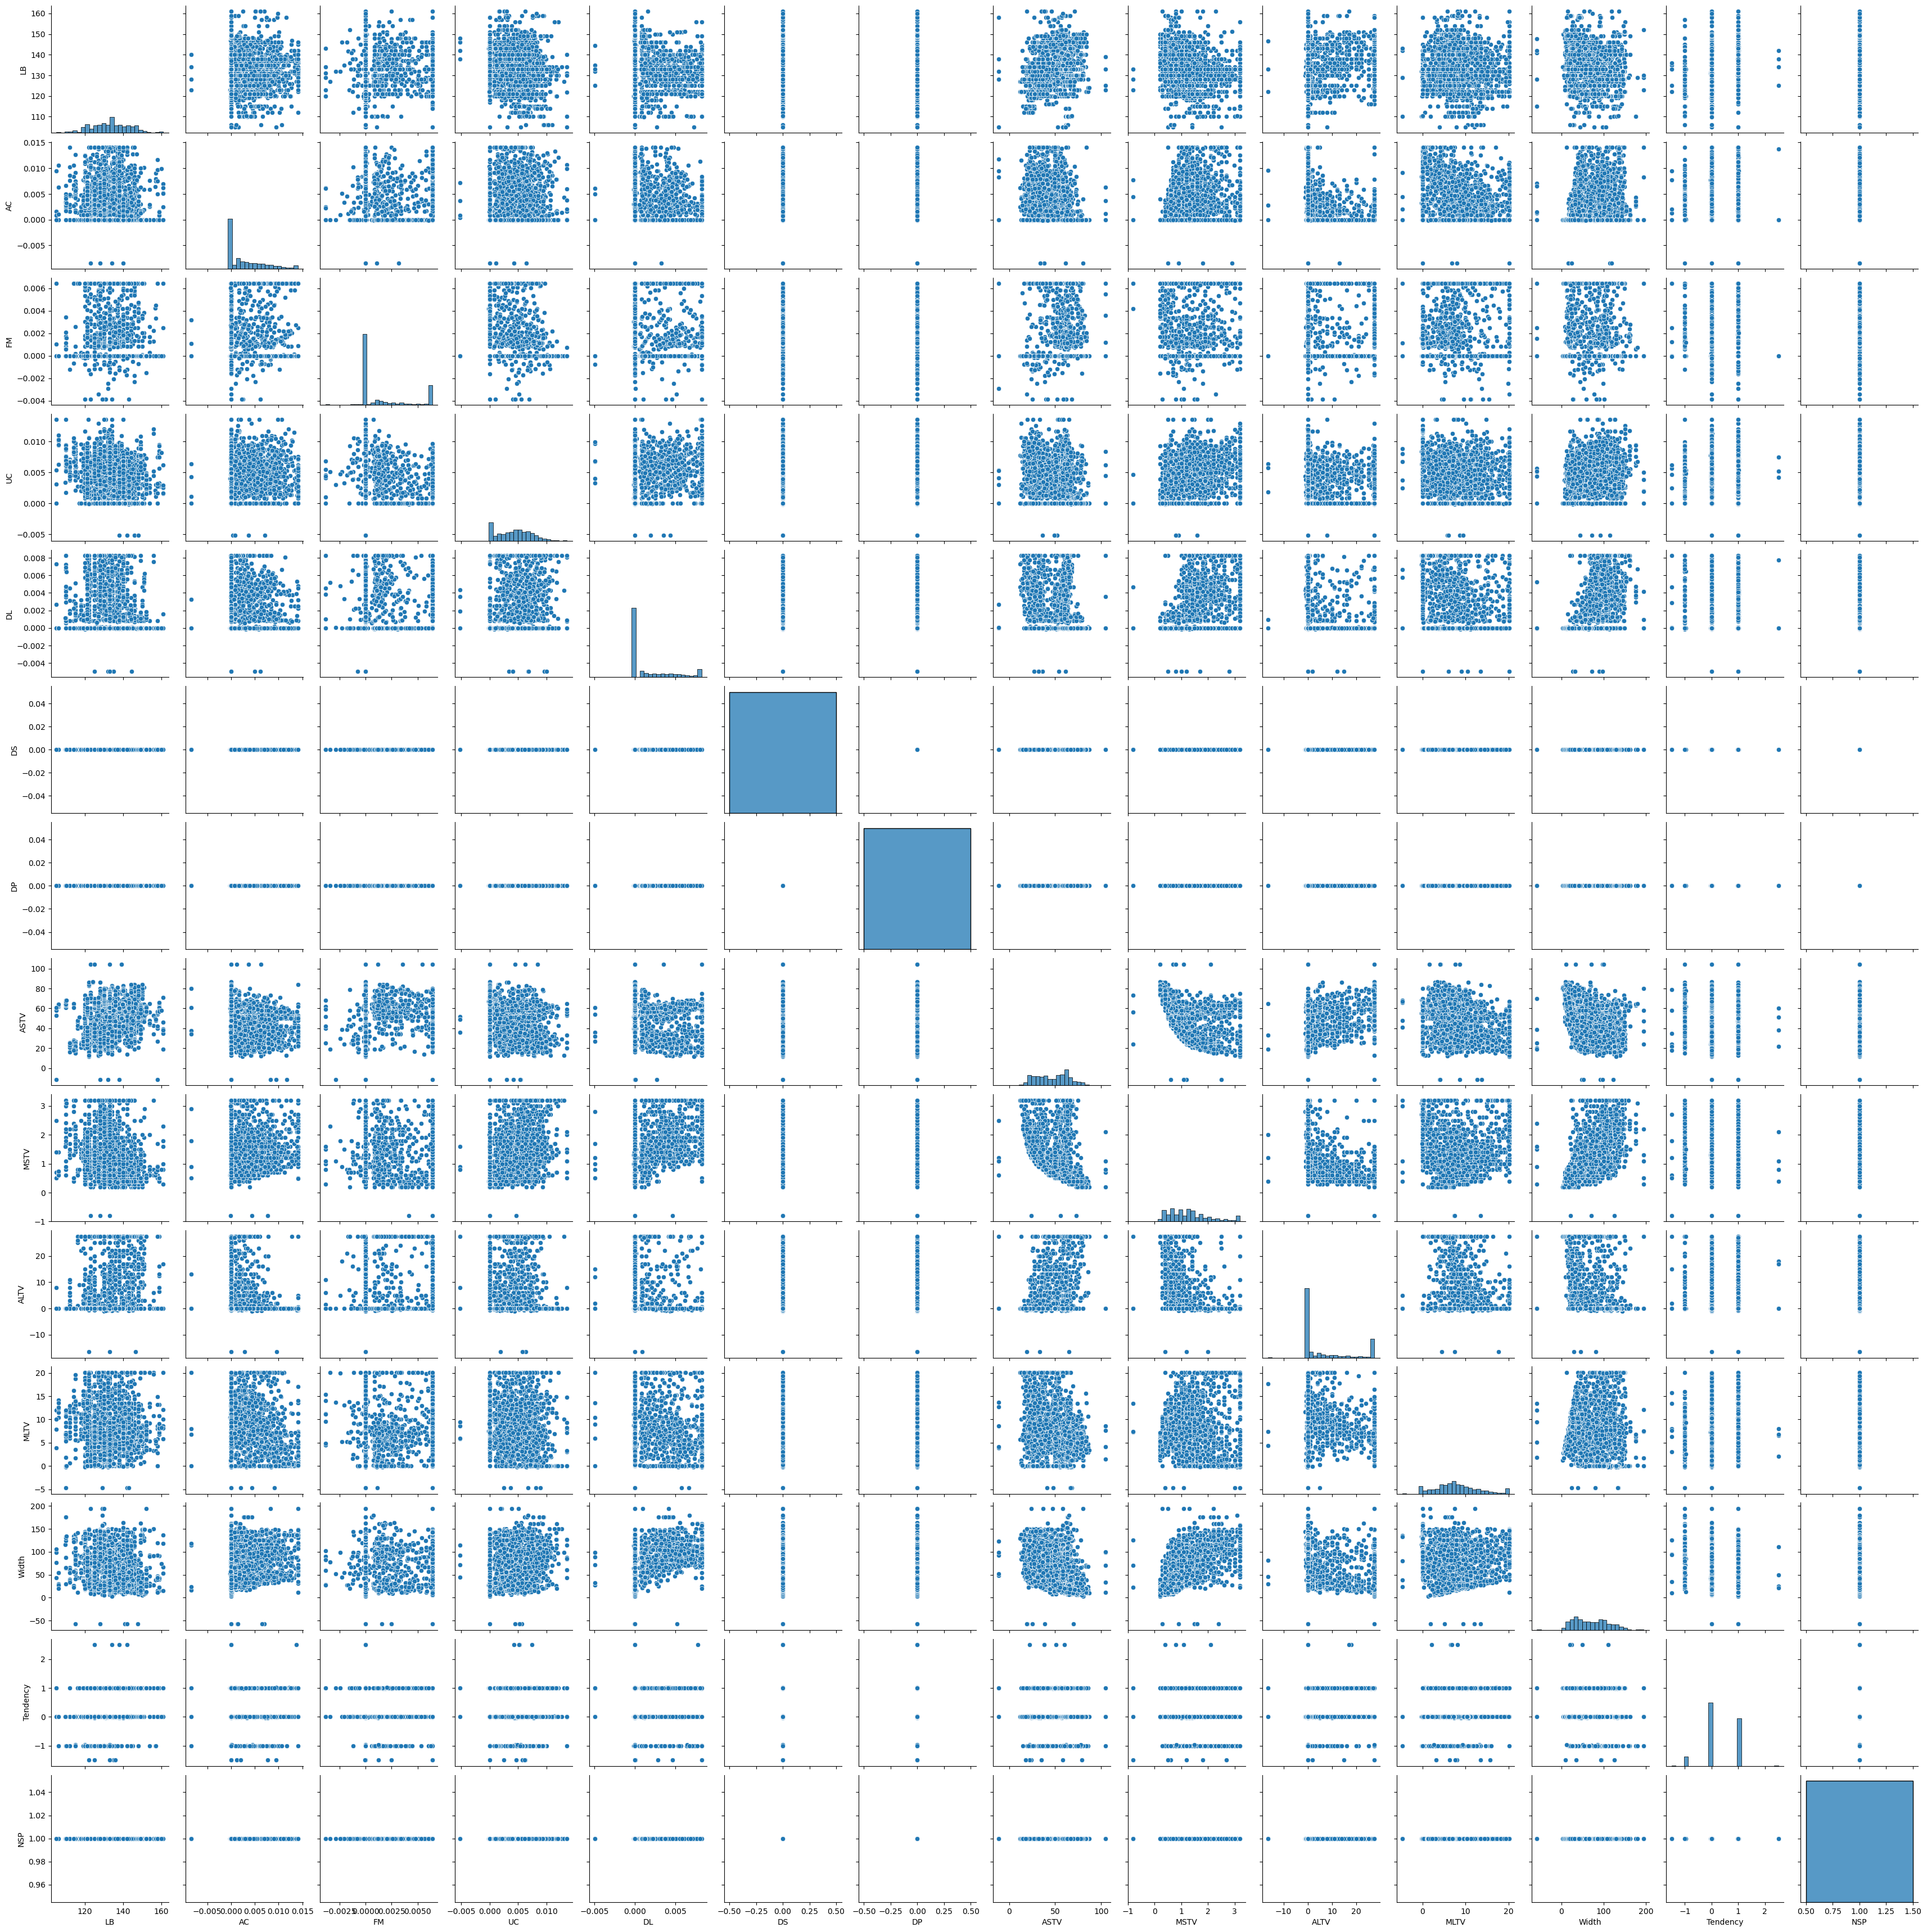

In [133]:
sns.pairplot(data=df)
plt.show()

### 4) Pattern Recognition and Insights:

##### ●	Identify any correlations between variables and discuss their potential implications.

In [137]:
corr

LB        AC        FM        UC        DL  DS  DP      ASTV  \
LB        1.000000 -0.081548 -0.006840 -0.163345 -0.156314 NaN NaN  0.285464   
AC       -0.081548  1.000000  0.075611  0.093222 -0.103258 NaN NaN -0.273189   
FM       -0.006840  0.075611  1.000000 -0.318156 -0.018024 NaN NaN  0.155798   
UC       -0.163345  0.093222 -0.318156  1.000000  0.268151 NaN NaN -0.217484   
DL       -0.156314 -0.103258 -0.018024  0.268151  1.000000 NaN NaN -0.112289   
DS             NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   
DP             NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   
ASTV      0.285464 -0.273189  0.155798 -0.217484 -0.112289 NaN NaN  1.000000   
MSTV     -0.295132  0.216861  0.070412  0.298462  0.566625 NaN NaN -0.433731   
ALTV      0.322864 -0.408246 -0.013820 -0.294226 -0.296383 NaN NaN  0.438800   
MLTV     -0.042241 -0.151713 -0.036439 -0.073152 -0.242345 NaN NaN -0.323930   
Width    -0.139978  0.283750  0.164178  0.131010  0.514238 NaN NaN -0.242111   
Tendency  0.281144  0.030489  0.000302 -0.074729  0.014025 NaN NaN -0.010237   
NSP            NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   

              MSTV      ALTV      MLTV     Width  Tendency  NSP  
LB       -0.295132  0.322864 -0.042241 -0.139978  0.281144  NaN  
AC        0.216861 -0.408246 -0.151713  0.283750  0.030489  NaN  
FM        0.070412 -0.013820 -0.036439  0.164178  0.000302  NaN  
UC        0.298462 -0.294226 -0.073152  0.131010 -0.074729  NaN  
DL        0.566625 -0.296383 -0.242345  0.514238  0.014025  NaN  
DS             NaN       NaN       NaN       NaN       NaN  NaN  
DP             NaN       NaN       NaN       NaN       NaN  NaN  
ASTV     -0.433731  0.438800 -0.323930 -0.242111 -0.010237  NaN  
MSTV      1.000000 -0.541296  0.010734  0.646155 -0.064696  NaN  
ALTV     -0.541296  1.000000 -0.132584 -0.439604  0.052204  NaN  
MLTV      0.010734 -0.132584  1.000000  0.073599  0.142741  NaN  
Width     0.646155 -0.439604  0.073599  1.000000  0.101289  NaN  
Tendency -0.064696  0.052204  0.142741  0.101289  1.000000  NaN  
NSP            NaN       NaN       NaN       NaN       NaN  NaN

##### ●	Look for trends or patterns over time if temporal data is available.

### 5) Conclusion:

##### ● Summarize the key insights and patterns discovered through your exploratory analysis.

##### ●	Discuss how these findings could impact decision-making or further analyses.

In [ ]:
We can build a model by 